# Proyecto 1 - Análisis exploratorio

Diego Andrés Morales Aquino <br>
21762

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("dataset_feature_engineering.csv")

## Análisis exploratorio

In [48]:
# Número de features
print(f"Total de features: {len(data.columns)}")
# Número de registros
print(f"Total de registros: {len(data)}")

Total de features: 35
Total de registros: 1852394


In [49]:
# Desplegar primeras filas del dataset
data.head(5)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [39]:
# Observar el tipo de datos de cada columna
data.dtypes

cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           float64
amt_month_s

In [40]:
#report = ProfileReport(data)
#report

In [41]:
report.to_file("dataset_profile_report.html")

NameError: name 'report' is not defined

### Frecuencia por categoría

In [ ]:
category_freq = data['category'].value_counts().reset_index()
category_freq.columns = ['category', 'count']

print(category_freq)


          category   count
0    gas_transport  188029
1      grocery_pos  176191
2             home  175460
3     shopping_pos  166463
4        kids_pets  161727
5     shopping_net  139322
6    entertainment  134118
7      food_dining  130729
8    personal_care  130085
9   health_fitness  122553
10        misc_pos  114229
11        misc_net   90654
12     grocery_net   64878
13          travel   57956


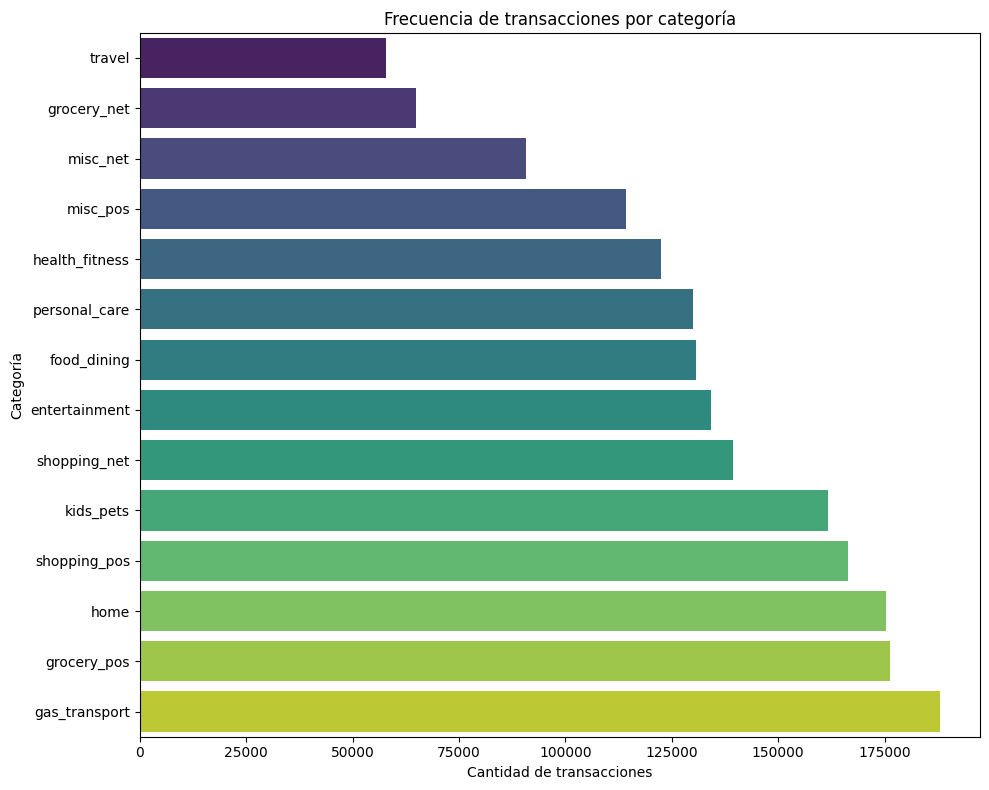

In [ ]:
# Agrupar y contar categorías
category_counts = data['category'].value_counts().sort_values(ascending=True)

# Crear un DataFrame para usar `hue` correctamente (aunque no haya grupos)
category_df = category_counts.reset_index()
category_df.columns = ['category', 'count']
category_df['hue'] = category_df['category']  # Dummy hue para aplicar el palette

# Plot sin warning
plt.figure(figsize=(10, 8))
sns.barplot(data=category_df, x='count', y='category', hue='hue', palette='viridis', dodge=False, legend=False)
plt.title('Frecuencia de transacciones por categoría')
plt.xlabel('Cantidad de transacciones')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()


### Cantidad de transacciones legítimas vs fraudulentas

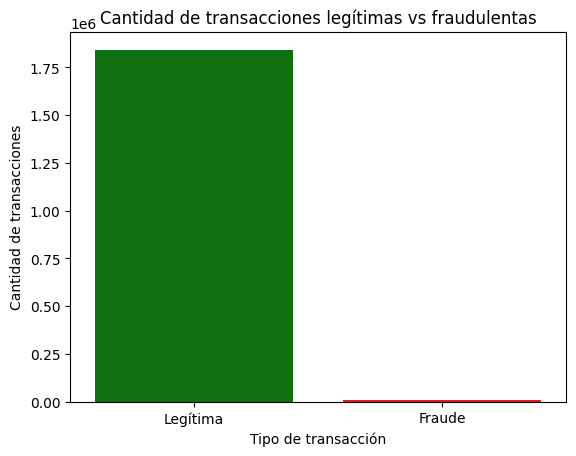

In [ ]:
# Crear un DataFrame con los valores
fraud_df = pd.DataFrame({
    'Tipo': ['Legítima', 'Fraude'],
    'Cantidad': data['is_fraud'].value_counts().sort_index().values
})

# Gráfico con hue explícito
sns.barplot(data=fraud_df, x='Tipo', y='Cantidad', hue='Tipo', palette={'Legítima': 'green', 'Fraude': 'red'}, legend=False)
plt.title('Cantidad de transacciones legítimas vs fraudulentas')
plt.ylabel('Cantidad de transacciones')
plt.xlabel('Tipo de transacción')
plt.show()


### Distribución de transacciones por hora

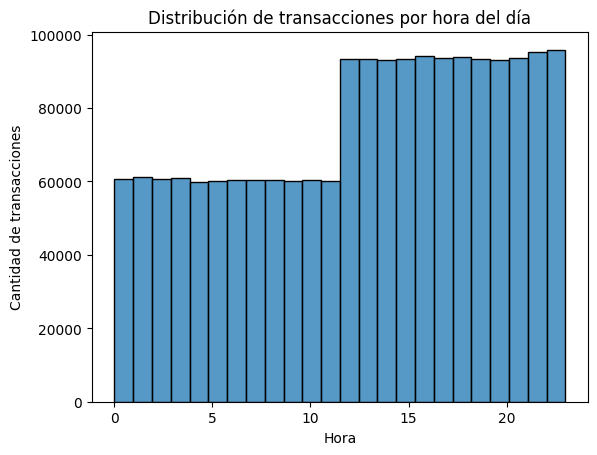

In [ ]:
sns.histplot(data=data, x='hour', bins=24, kde=False)
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de transacciones')
plt.show()


Se muestra a qué horas del día se concentran las transacciones. Analizar la distribución horaria es útil para detectar patrones anómalos, ya que los fraudes tienden a ocurrir fuera del horario hábil, como en la madrugada.

### Distribución del monto de transacciones (utilizando escala log)

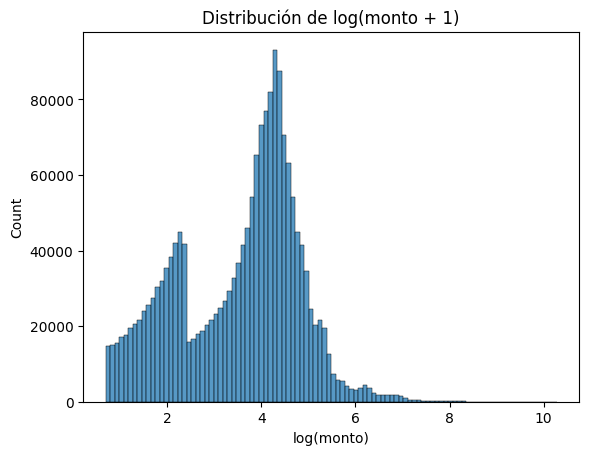

In [ ]:
sns.histplot(np.log1p(data['amt']), bins=100)
plt.title('Distribución de log(monto + 1)')
plt.xlabel('log(monto)')
plt.show()

El monto de las transacciones puede variar ampliamente. En esta gráfico se puede observar tanto los valores comunes como los extremos. Esta información ayuda a detectar si los fraudes se asocian con montos atípicos. Se está utilizando una escala logarítmica para poder visualizar de mejor manera.

### Porcentaje de fraudes por categoría de comercio

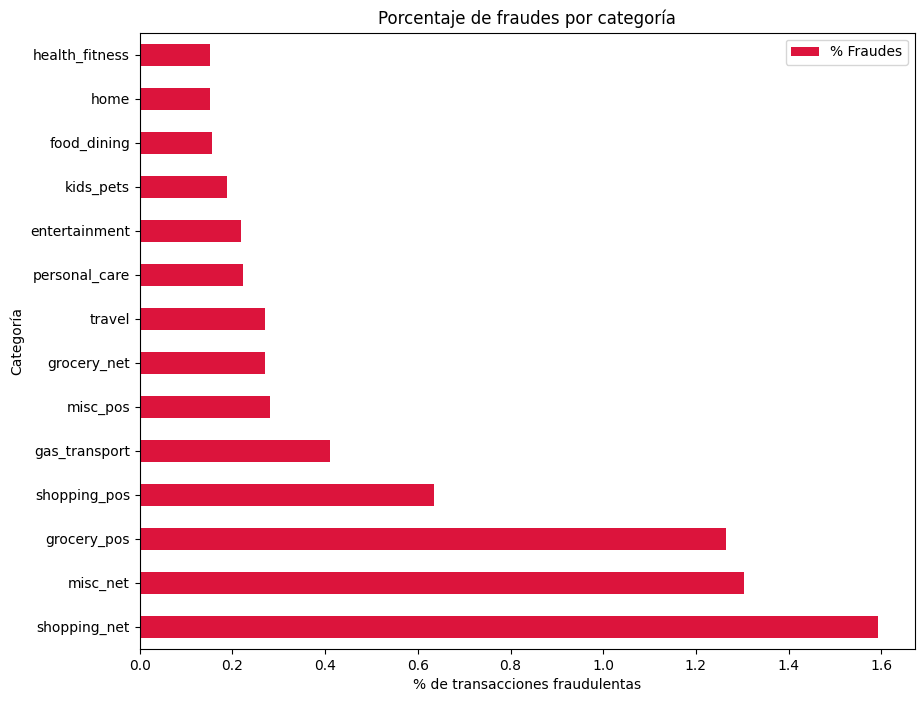

In [ ]:
category_fraud_freq = data.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
category_fraud_freq.columns = ['Legítimas', 'Fraudes']
category_fraud_freq['Total'] = category_fraud_freq.sum(axis=1)
category_fraud_freq['% Fraudes'] = (category_fraud_freq['Fraudes'] / category_fraud_freq['Total']) * 100
category_fraud_freq.sort_values('% Fraudes', ascending=False)[['% Fraudes']].plot(kind='barh', figsize=(10, 8), color='crimson')

plt.title('Porcentaje de fraudes por categoría')
plt.xlabel('% de transacciones fraudulentas')
plt.ylabel('Categoría')
plt.show()


Este gráfico permite identificar en qué categorías comerciales se concentran más fraudes proporcionalmente. Las transacciones por internet tiene una mayor posibilidad de transacciones fraudulentas. Mientras que, la categoría de viajes posee un nivel medio-bajo de transacciones de fraude.

### Monto promedio por tipo de transacción

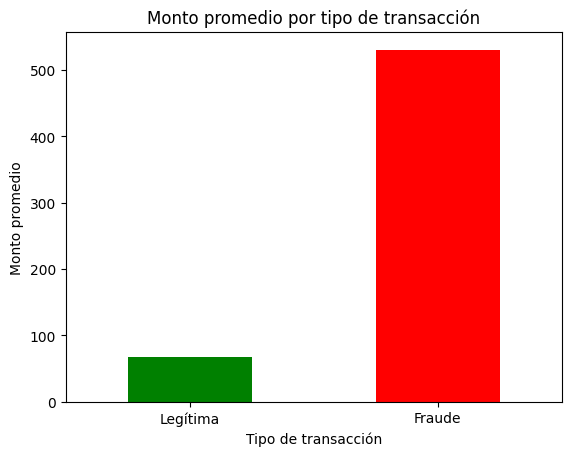

In [ ]:
data.groupby('is_fraud')['amt'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Monto promedio por tipo de transacción')
plt.xlabel('Tipo de transacción')
plt.ylabel('Monto promedio')
plt.xticks([0, 1], ['Legítima', 'Fraude'], rotation=0)
plt.show()


Se puede observar que las transacciones fraudulentas generalmente presentan montos mucho más elevados que las legítimas en promedio.

### Cuántas veces se ha comprado en un comercio: legítimo vs fraude

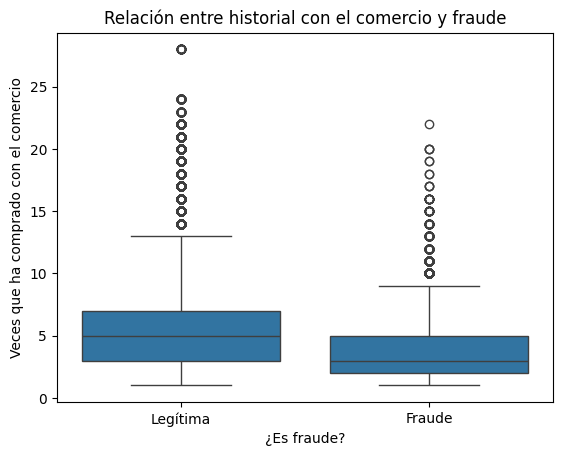

In [ ]:
sns.boxplot(x='is_fraud', y='times_shopped_at_merchant', data=data)
plt.title('Relación entre historial con el comercio y fraude')
plt.xlabel('¿Es fraude?')
plt.ylabel('Veces que ha comprado con el comercio')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()


Se observa que las transacciones fraudulentas tienden a concentrarse en clientes con un menor número de compras previas en un comercio, en comparación con las transacciones legítimas.

### Ubicación geográfica por tipo de transacción

C:\Users\diego\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


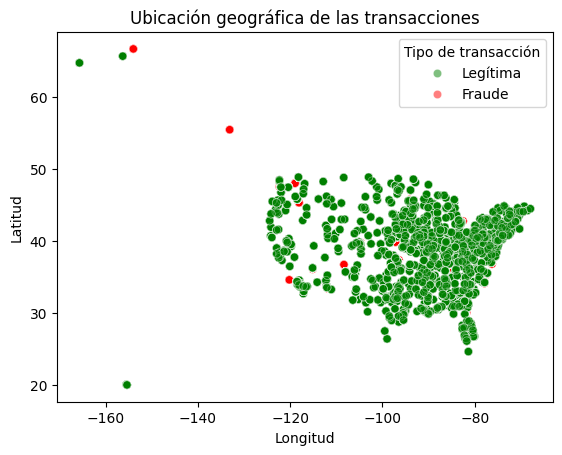

In [ ]:
data['fraud_label'] = data['is_fraud'].map({0: 'Legítima', 1: 'Fraude'})

sns.scatterplot(
    data=data,
    x='long', 
    y='lat', 
    hue='fraud_label', 
    palette={'Legítima': 'green', 'Fraude': 'red'},
    alpha=0.5
)

plt.title('Ubicación geográfica de las transacciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tipo de transacción')
plt.show()



No se puede observar una tendencia clara de una ubicación geográfica en donde se concentren las transacciones fraudulentas. Sin embargo, resulta interesante que se puede apreciar la forma de los EEUU al resaltar la ubicación de las transacciones.

## Data engineering

In [3]:
# Ordenar por número de tarjeta y tiempo de la transacción
data = data.sort_values(by=['cc_num', 'unix_time']).reset_index(drop=True)

### amt_avg_per_visit_to_merchant

Calcular el monto promedio gastado en cada visita a un comercio específico. Será útil para detectar patrones inusuales en el gasto: por ejemplo, si normalmente alguien gasta poco en una agencia de viajes y de pronto hace una compra grande, podría levantar sospechas.

In [4]:
data['amt_avg_per_visit_to_merchant'] = data['amt'] / (data['times_shopped_at_merchant'] + 1)

In [52]:
data['amt_avg_per_visit_to_merchant'].describe()

count    1.852394e+06
mean     1.439028e+01
std      4.671809e+01
min      4.478261e-02
25%      2.056667e+00
50%      7.178750e+00
75%      1.575143e+01
max      1.355989e+04
Name: amt_avg_per_visit_to_merchant, dtype: float64

### amt_ratio_to_month_total
Representa qué porcentaje del gasto mensual total representa la transacción actual. 

In [5]:
data['amt_ratio_to_month_total'] = data['amt'] / (data['amt_month'] + 1)


In [54]:
data['amt_ratio_to_month_total'].describe()

count    1.852394e+06
mean     5.551670e-02
std      1.385907e-01
min      3.097998e-05
25%      4.005020e-03
50%      1.359321e-02
75%      3.982134e-02
max      9.999140e-01
Name: amt_ratio_to_month_total, dtype: float64

### consecutive_transactions_same_merchant
Evalúa si hubo múltiples transacciones con el mismo comercio en un periodo de una hora

In [6]:
data['consecutive_transactions_same_merchant'] = (
    (data['merchant'] == data.groupby('cc_num')['merchant'].shift(1)) &
    (data['unix_time'] - data.groupby('cc_num')['unix_time'].shift(1) < 3600)
).astype(int)

In [ ]:
data['consecutive_transactions_same_merchant'].value_counts()

consecutive_transactions_same_merchant
0    1851492
1        902
Name: count, dtype: int64

### relative_distance_vs_previous
Diferencia de distancia respecto a la transacción anterior de la misma tarjeta. Si el usuario suele comprar cerca de su ubicación habitual, una transacción con una distancia totalmente distinta podría ser una señal de fraude.

In [7]:
# Calculars la distancia respecto a la transacción anterior del mismo usuario
data['prev_dist'] = data.groupby('cc_num')['dist_between_client_and_merch'].shift(1)
data['relative_distance_vs_previous'] = (data['dist_between_client_and_merch'] - data['prev_dist']).fillna(0)


In [ ]:
data['relative_distance_vs_previous'].describe()

count    1.852394e+06
mean     5.120865e-04
std      4.101586e+01
min     -1.411520e+02
25%     -2.846672e+01
50%      0.000000e+00
75%      2.847191e+01
max      1.379217e+02
Name: relative_distance_vs_previous, dtype: float64

### merchant_entropy_user_level
La diversidad de comercios en los que un usuario ha comprado, usando entropía. Usuarios con perfiles muy consistentes (baja entropía) que repentinamente compran en lugares muy variados podrían estar siendo vulnerados.

In [8]:
from scipy.stats import entropy

def calc_entropy(merchants):
    probs = merchants.value_counts(normalize=True)
    return entropy(probs)

merchant_entropy = data.groupby('cc_num')['merchant'].agg(calc_entropy)
data = data.merge(merchant_entropy.rename('merchant_entropy_user_level'), left_on='cc_num', right_index=True)


In [ ]:
data['merchant_entropy_user_level'].describe()

count    1.852394e+06
mean     6.274365e+00
std      1.511986e-01
min      1.560710e+00
25%      6.246483e+00
50%      6.310343e+00
75%      6.364319e+00
max      6.416477e+00
Name: merchant_entropy_user_level, dtype: float64

### has_traveled_far_in_a_day
Evalúa si en ese día el usuario ha comprado desde un lugar a más de 100km de su ubicación habitual.

In [9]:
# Calcula la distancia diaria máxima por tarjeta
daily_max_dist = data.groupby(['cc_num', 'year', 'trans_month', 'trans_day'])['dist_between_client_and_merch'].transform('max')
data['has_traveled_far_in_a_day'] = (daily_max_dist > 100).astype(int)


Text(0.5, 1.0, 'Porcentaje de transacciones con distancia máxima diaria > 100 km')

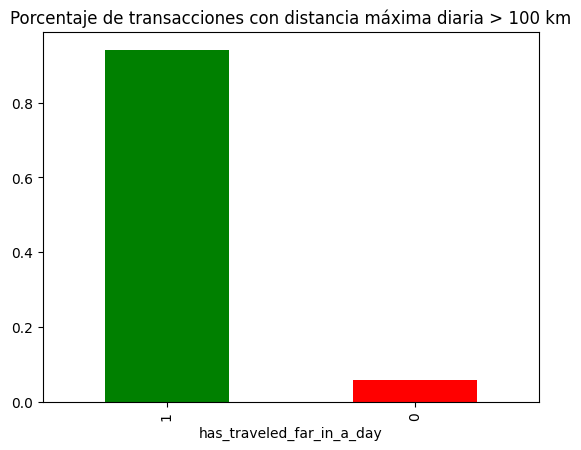

In [ ]:
data['has_traveled_far_in_a_day'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Porcentaje de transacciones con distancia máxima diaria > 100 km')

### is_travel

In [10]:
data['travel'] = data['category'].str.lower().isin(['travel'])

In [ ]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,times_shopped_at_merchant_month,times_shopped_at_merchant_day,amt_avg_per_visit_to_merchant,amt_ratio_to_month_total,consecutive_transactions_same_merchant,prev_dist,relative_distance_vs_previous,merchant_entropy_user_level,has_traveled_far_in_a_day,travel
0,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,1,1,1.211667,0.879081,0,NaN,0.000000,6.28729,1,False
1,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,2,2,4.072308,0.864891,0,127.629296,-17.426304,6.28729,1,False
2,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,1,3,7.461818,0.572824,0,110.202992,-88.361165,6.28729,1,False
3,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,1,1,4.348750,0.195362,0,21.841827,65.282594,6.28729,1,False
4,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,1,2,6.795000,0.132417,0,87.124420,-12.771544,6.28729,1,False


## Entrenamiento de modelo base

In [ ]:
print("Rango de fechas en data['datetime']:", data['datetime'].min(), "→", data['datetime'].max())


Rango de fechas en data['datetime']: 2012-01-01 00:00:18 → 2013-12-31 23:59:34


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convertir unix_time a datetime
data['datetime'] = pd.to_datetime(data['unix_time'], unit='s')

# Crear columna booleana para categoría 'viajes'
data['is_travel'] = data['category'].str.lower().isin(['travel', 'airline', 'agency', 'vacation', 'tourism'])

# Codificar columnas categóricas que se usan como features
for col in ['category', 'gender', 'merchant', 'street', 'city', 'state', 'job']:
    data[col] = LabelEncoder().fit_transform(data[col])

# Cortar en noviembre de 2013
train_data = data[data['datetime'] < '2013-11-01']
test_data = data[data['datetime'] >= '2013-11-01']


# Columnas que no se usarán como features
drop_cols = ['is_fraud', 'datetime', 'first', 'last', 'dob', 'trans_num']

# Seleccionar features
features = [col for col in train_data.columns if col not in drop_cols]

X_train = train_data[features]
y_train = train_data['is_fraud']
X_test = test_data[features]
y_test = test_data['is_fraud']

### Grid search para encontrar hiperparámetros adecuados

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score, confusion_matrix

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_params = None
results = []

param_grid = {
    'num_leaves': [31, 64],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.05],
    'min_child_samples': [20, 50]
}

# Recorremos cada combinación de parámetros
for i, params in enumerate(ParameterGrid(param_grid), 1):
    print(f"\n[{i}/{len(ParameterGrid(param_grid))}] Probando combinación: {params}")
    
    fold_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = LGBMClassifier(
            objective='binary',
            metric='auc',
            n_estimators=1000,
            verbosity=-1,
            device='gpu',
            **params
        )
        
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='auc',
            callbacks=[early_stopping(10), log_evaluation(50)]
        )
        
        y_pred = (model.predict_proba(X_val)[:, 1] > 0.5).astype(int)
        f1 = f1_score(y_val, y_pred)
        fold_scores.append(f1)
        
        print(f"  Fold {fold} F1-score: {f1:.4f}")
    
    avg_f1 = np.mean(fold_scores)
    print(f"=> Promedio F1-score para esta combinación: {avg_f1:.4f}")
    results.append((params, avg_f1))
    
    if avg_f1 > best_score:
        best_score = avg_f1
        best_params = params

print(f"\nMejor combinación de parámetros: {best_params} con F1-score promedio: {best_score:.4f}")


[1/16] Probando combinación: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'num_leaves': 31}
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.953134
  Fold 1 F1-score: 0.7731
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.958467
  Fold 2 F1-score: 0.7978
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.955644
  Fold 3 F1-score: 0.7791
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.976203
  Fold 4 F1-score: 0.7652
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.973395
  Fold 5 F1-score: 0.7912
=> Promedio F1-score para esta combinación: 0.7813

[2/16] Probando combinación: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_sam

### Métricas personalizadas

In [17]:
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, fbeta_score
from lightgbm import LGBMClassifier

In [30]:
def evaluate_model_with_custom_metric(X_train, y_train, X_test, y_test, custom_feval=None, metric_name=None):
    """
    Entrena un modelo LGBM con una métrica personalizada (feval) y evalúa en el test set.
    Retorna un DataFrame con métricas clave: FP ratio, AUC, F1-score, TP, FP.
    
    custom_feval: función tipo LightGBM feval (devuelve nombre, valor, is_higher_better)
    metric_name: string con el nombre que quieres mostrar en el resultado
    """
    model = LGBMClassifier(
        objective='binary',
        n_estimators=1000,
        verbosity=-1,
        learning_rate=0.05,
        max_depth=10,
        num_leaves=64,
        min_child_samples=20,
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=custom_feval,
        callbacks=[early_stopping(10)]
    )
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)

    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    # TP, FP
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    fp_ratio = (tp + fp) / (tp + 1e-9)

    # Resultado como DataFrame
    results = pd.DataFrame([{
        'custom_metric': metric_name if metric_name else custom_feval.__name__,
        'fp_ratio': fp_ratio,
        'auc': auc,
        'f1_score': f1,
        'tp': tp,
        'fp': fp
    }])
    
    return results


In [31]:
from sklearn.metrics import confusion_matrix, fbeta_score

def fp_penalty(preds, train_data):
    """Número de falsos positivos a penalizar (minimizar)."""
    labels = train_data.astype(int)
    preds_binary = (preds > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(labels, preds_binary).ravel()
    return 'fp_penalty', float(fp), False

def fp_ratio(preds, train_data):
    """(TP + FP) / TP — Minimizarlo."""
    labels = train_data.astype(int)
    preds_binary = (preds > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(labels, preds_binary).ravel()
    ratio = (tp + fp) / (tp + 1e-9)  # evitar división por cero
    return 'fp_ratio', ratio, False

def fbeta_half(preds, train_data):
    """F0.5-score: favorece recall más que precisión."""
    labels = train_data.astype(int)
    preds_binary = (preds > 0.5).astype(int)
    score = fbeta_score(labels, preds_binary, beta=0.5)
    return 'f0.5', score, True


In [32]:

results_baseline = evaluate_model_with_custom_metric(
    X_train, y_train, X_test, y_test,
    custom_feval=None,
    metric_name='baseline'
)

results_fp_penalty = evaluate_model_with_custom_metric(
    X_train, y_train, X_test, y_test,
    custom_feval=fp_penalty,
    metric_name='fp_penalty'
)

results_fp_ratio = evaluate_model_with_custom_metric(
    X_train, y_train, X_test, y_test,
    custom_feval=fp_ratio,
    metric_name='fp_ratio'
)

results_fbeta_half = evaluate_model_with_custom_metric(
    X_train, y_train, X_test, y_test,
    custom_feval=fbeta_half,
    metric_name='f0.5'
) 

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.00423576
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0109664	valid_0's fp_penalty: 552
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0109664	valid_0's fp_ratio: 5.52e+11
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0109664	valid_0's f0.5: 0


### Comparación de métricas personalizadas

In [33]:
# Imprimir resultados de todos los df
results = pd.concat([results_baseline, results_fp_penalty, results_fp_ratio, results_fbeta_half], ignore_index=True)
results

,custom_metric,fp_ratio,auc,f1_score,tp,fp
0,baseline,1.273585,0.995725,0.776557,424,116
1,fp_penalty,1.268222,0.901697,0.695035,343,92
2,fp_ratio,1.268222,0.901697,0.695035,343,92
3,f0.5,1.268222,0.901697,0.695035,343,92
